In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
x_sinc = np.arange(start = -10, stop = 10, step = 0.08)
y_sinc = np.sinc(x_sinc)
y_noise = y_sinc + np.random.normal(loc = 0, scale = 0.05, size = 250)

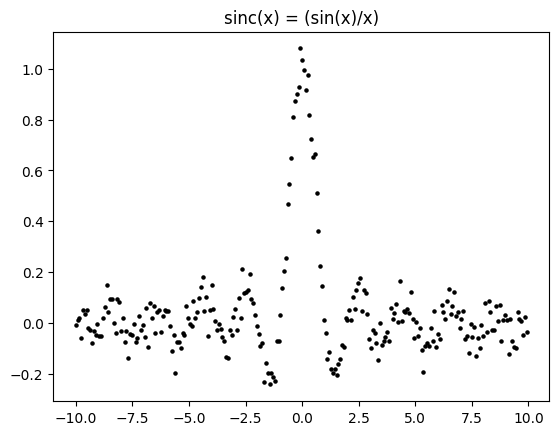

In [23]:
plt.scatter(x_sinc, y_noise, color = 'black', s = 5)
plt.title('sinc(x) = (sin(x)/x)')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sinc, y_noise, random_state = 0, train_size = 0.7)

In [25]:
from sklearn.cluster import KMeans
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
kmeans = KMeans(n_clusters = 1, random_state = 0, n_init = 'auto').fit(X_train)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

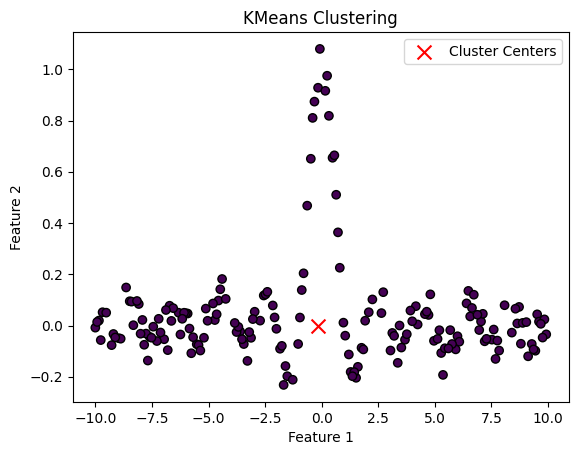

In [26]:
plt.scatter(X_train, y_train, c=cluster_labels, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(cluster_centers[:, 0], np.zeros((cluster_centers.shape[0])), c='red', marker='x', s=100, label='Cluster Centers')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()

# Show the plot
plt.show()

In [27]:
import train_RBF
ret_ = train_RBF.trainRBF(X_train, y_train, cluster_centers.shape[0], 0.6)

H shape : (175, 1)
Haug shape : (175, 2)
yin shape : (175, 1)
W shape : (2, 1)


In [28]:
W = ret_[3]
W

array([[ 0.75912916],
       [-0.02680277]])

In [29]:
yhat_test = train_RBF.y_RBF(X_test, ret_)
yhat_train = train_RBF.y_RBF(X_train, ret_)

You're having the error tuple index out of range. So we will change the numer of dimensions...


In [30]:
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(y_train, yhat_train)
error_test = mean_squared_error(y_test, yhat_test)
print(f"The train error is {error_train}")
print(f"The test error is {error_test}")

The train error is 0.016615932685696156
The test error is 0.02309079049997864


In [31]:
def radial_n_var(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))


In [32]:
cluster_centers = cluster_centers.reshape(-1, )
def create_graphics(centers : np.ndarray):
    x_seq = np.linspace(start = -10, stop = 10, num = 250)
    for i in centers:
        normal_function = radial_n_var(x_seq, i, 0.6)
        if i == centers[centers.shape[0] - 1]:
            plt.plot(x_seq, normal_function, color = 'blue', label = 'gauss(x)')
            break
        plt.plot(x_seq, normal_function, color = 'blue')
    plt.plot(x_seq, W[0]*np.sinc(x_seq), color = 'red', label = 'sinc(x)')
    plt.legend()

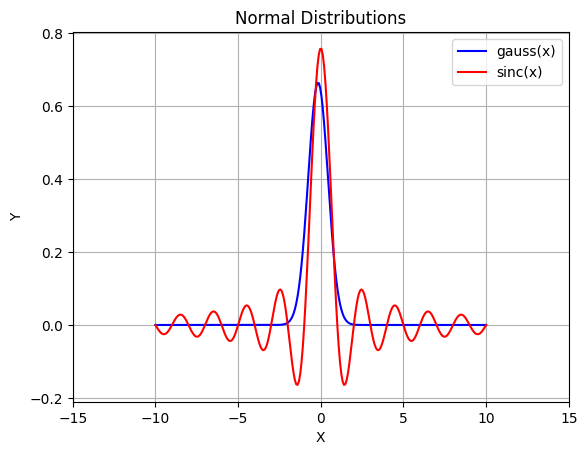

In [33]:
create_graphics(cluster_centers)  # Plot normal distributions with 5 centers
plt.xlabel('X')
plt.xlim(-15, 15)
plt.ylabel('Y')
plt.title('Normal Distributions')
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
lst_error_test = list()
lst_param = list()
for i in range(1, 200, 1):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 'auto').fit(X_train)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    ret_ = train_RBF.trainRBF(X_train, y_train, i, 0.6)
    yhat_test = train_RBF.y_RBF(X_test, ret_)
    
    error_test = mean_squared_error(y_test, yhat_test)
    lst_error_test.append(error_test)
    lst_param.append(i)
lst_error_test = np.array(lst_acc_test)
lst_param = np.array(lst_param)

H shape : (175, 1)
Haug shape : (175, 2)
yin shape : (175, 1)
W shape : (2, 1)
You're having the error tuple index out of range. So we will change the numer of dimensions...
H shape : (175, 2)
Haug shape : (175, 3)
yin shape : (175, 1)
W shape : (3, 1)
You're having the error tuple index out of range. So we will change the numer of dimensions...
H shape : (175, 3)
Haug shape : (175, 4)
yin shape : (175, 1)
W shape : (4, 1)
You're having the error tuple index out of range. So we will change the numer of dimensions...
H shape : (175, 4)
Haug shape : (175, 5)
yin shape : (175, 1)
W shape : (5, 1)
You're having the error tuple index out of range. So we will change the numer of dimensions...
H shape : (175, 5)
Haug shape : (175, 6)
yin shape : (175, 1)
W shape : (6, 1)
You're having the error tuple index out of range. So we will change the numer of dimensions...
H shape : (175, 6)
Haug shape : (175, 7)
yin shape : (175, 1)
W shape : (7, 1)
You're having the error tuple index out of range. S

ValueError: n_samples=175 should be >= n_clusters=176.

In [36]:
idx = np.argmin(lst_error_test)
print(f"Using {lst_param[idx]} radial neurons in the hidden layer the model has the better performance.")

Using 24 radial neurons in the hidden layer the model has the better performance.


In [ ]:
y_test

In [ ]:
idx = np.argmax(lst_acc_test)
print(f"The value of K that give us the best performance in test data is : {lst_param[idx]}")